# Dataset load_diabetes de Scikit-Learn

El dataset `load_diabetes` es un conjunto de datos incluido en la librería Scikit-Learn que se utiliza comúnmente en **problemas de regresión**. El objetivo principal de este dataset es proporcionar información relevante para predecir el progreso de la diabetes (variable `progression`) en un año en función de un conjunto de variables independientes.

[Podemos encontrar la información de este dataset en la documentación de sklearn.](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar el dataset load_diabetes
data = load_diabetes()

df = pd.DataFrame(data.data, columns=data.feature_names)
y_progression = data.target  # Variable progresión original
df['progression'] = y_progression

df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  progression  
0   -0.002592  0.019907 -0.017646        151.0  
1   -0.039493 -0.068332 -0.092204         75.0  
2   -0.002592  0.002861 -0.025930        141.0  
3    0.034309  0.022688 -0.009362        206.0  
4   -0.002592 -0.031988 -0.046641        135.0  
..        ...       ...       ...          ...  
437 -0.002592  0.031193  0.007207        178.0  
438  0.034309 -0.018114  0.044485        104.0  
439 -0.011080 -0.046883  0.015491        132.0  
440  0.026560  0.044529 -0.025930        220.0  
441 -0.039493 -0.004222  0.003064         57.0  

[442 rows x 11 columns]

Si nos damos cuenta, las variables tienen valores extraños. Sobre todo `age` y `sex` que por intuición deberían ser valores enteros o por lo menos mayores que cero.

Cuando se tengan dudas de este tipo (en la vida real) siempre es conveniente retroceder a la fuente e intentar aclarar dudas con "el dueño del dato". En este caso al ser un ejemplo ficticio nuestra fuente de información es la documentación de sklearn.

La cual muestra:
`sklearn.datasets.load_diabetes(*, return_X_y=False, as_frame=False, scaled=True)`

Aparentemente con un parámetro de escalamiento.

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar el dataset load_diabetes
data = load_diabetes(scaled=False)

df = pd.DataFrame(data.data, columns=data.feature_names)
y_progression = data.target  # Variable progresión original
df['progression'] = y_progression

df

age  sex   bmi      bp     s1     s2    s3    s4      s5     s6  \
0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0   
1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0   
2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0   
3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0   
4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0   
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...   
437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0   
438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0   
439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0   
440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0   
441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0   

     progression  
0          151.0  
1           75.0  
2          141.0  
3          206.0  
4          135.0  
..           ...  
437        178.0  
438        104.0  
439        132.0  
440        220.0  
441         57.0  

[442 rows x 11 columns]

### Variables

Las variables en este dataset se dividen en dos tipos: variables independientes y variable dependiente.

**Variable Dependiente:**
- `progression`: Esta variable es la que pretendemos predecir en un supuesto modelo. Representa la medida del progreso de la diabetes en un paciente después de un año. En términos médicos, se refiere a cómo la enfermedad ha avanzado en términos de su impacto en la salud del paciente durante un período de un año.

Un valor más alto de "progression" indica un mayor avance de la enfermedad en comparación con un valor más bajo.

**Variables Independientes:**
El dataset contiene 10 variables independientes que se consideran **posibles características predictoras** para el progreso de la diabetes. Estas variables son todas de tipo cuantitativo.

1. `age`: Edad del paciente en años.
2. `sex`: Género del paciente (0 para mujer, 1 para hombre).
3. `bmi`: Índice de masa corporal (BMI) del paciente.
4. `bp`: Presión arterial promedio.
5. `s1`: Concentración de suero de tipo s1.
6. `s2`: Concentración de suero de tipo s2.
7. `s3`: Concentración de suero de tipo s3.
8. `s4`: Concentración de suero de tipo s4.
9. `s5`: Concentración de suero de tipo s5.
10. `s6`: Concentración de suero de tipo s6.

Cada una de las variables independientes representa diferentes aspectos relacionados con la salud y la biología de los pacientes, y se espera que puedan ser utilizadas para predecir el progreso de la diabetes.

### Tipos de Datos

- `progression`: Cuantitativo Continuo
- `age`, `bmi`, `bp`, `s1`, `s2`, `s3`, `s4`, `s5`, `s6`: Cuantitativo Continuo
- `sex`: Cualitativo Nominal (0 para mujer, 1 para hombre), aunque aparentemente en la versión de sklearn tenemos una versión modificada.

## Transformar a problema de clasificación

In [15]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar el dataset load_diabetes
data = load_diabetes(scaled=False)

df = pd.DataFrame(data.data, columns=data.feature_names)
y_progression = data.target  # Variable progresión original

# Definir el umbral para la clasificación
umbral = 150  # Ejemplo de umbral, puedes ajustarlo según sea necesario
y_binary = np.where(y_progression >= umbral, 1, 0)

df['crítica_level'] = y_binary

df

age  sex   bmi      bp     s1     s2    s3    s4      s5     s6  \
0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0   
1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0   
2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0   
3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0   
4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0   
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...   
437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0   
438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0   
439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0   
440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0   
441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0   

     crítica_level  
0                1  
1                0  
2                0  
3                1  
4                0  
..             ...  
437              1  
438              0  
439              0  
440              1  
441              0  

[442 rows x 11 columns]

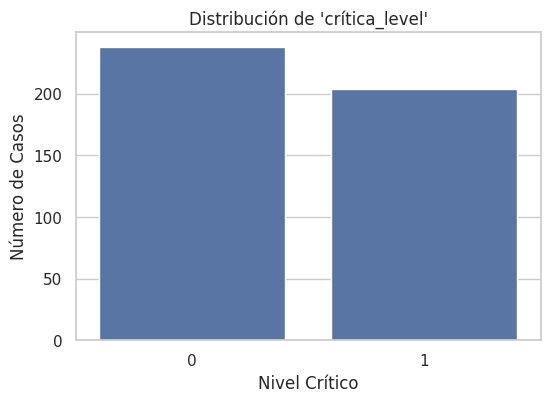

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de la variable dependiente "crítica_level"
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="crítica_level", data=df)
plt.title("Distribución de 'crítica_level'")
plt.xlabel("Nivel Crítico")
plt.ylabel("Número de Casos")
plt.show()

##Conclusiones gráfico "Distribución de 'critical_level'"

El gráfico muestra la distribución de la variable "Critical_level" en dos categorías: 0 (menos crítico) y 1 (más crítico).

1. **Distribución de Casos**:
  - Hay más casos en la categoría 0 que en la categoría 1. Esto sugiere que una mayor cantidad de pacientes tiene un "Critical_level" menor a 150, indicando un menor progreso de la diabetes después de un año.
2. **Implicaciones Médicas**:
 - La transformación de la variable "progression" a "Critical_level" permite identificar fácilmente a los pacientes con mayor riesgo (valor 1). Esto es útil para priorizar el tratamiento y seguimiento de estos pacientes.
3. **Clasificación Binaria**:
 - La elección del umbral de 150 facilita la clasificación binaria, permitiendo la aplicación de algoritmos de clasificación para predecir la gravedad del progreso de la diabetes en nuevos pacientes basados en sus características iniciales.

En resumen, la mayoría de los pacientes en el dataset tienen un "Critical_level" menor a 150, lo que sugiere que el progreso de la diabetes es menos crítico en estos casos. Esta distribución puede ayudar en el desarrollo de modelos predictivos que identifiquen a los pacientes que requieren mayor atención médica.

In [5]:
# Análisis exploratorio de datos
print(df.head())  # Muestra las primeras filas del DataFrame
print(df.info())  # Información sobre las columnas y tipos de datos
print(df.describe())  # Estadísticas descriptivas de las variables

    age  sex   bmi     bp     s1     s2    s3   s4      s5    s6  \
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0   
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0   
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0   
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0   
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0   

   crítica_level  
0              1  
1              0  
2              0  
3              1  
4              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            442 non-null    float64
 1   sex            442 non-null    float64
 2   bmi            442 non-null    float64
 3   bp             442 non-null    float64
 4   s1             442 non-null    float64
 5   s2             442 non-null    float64
 6   s3             

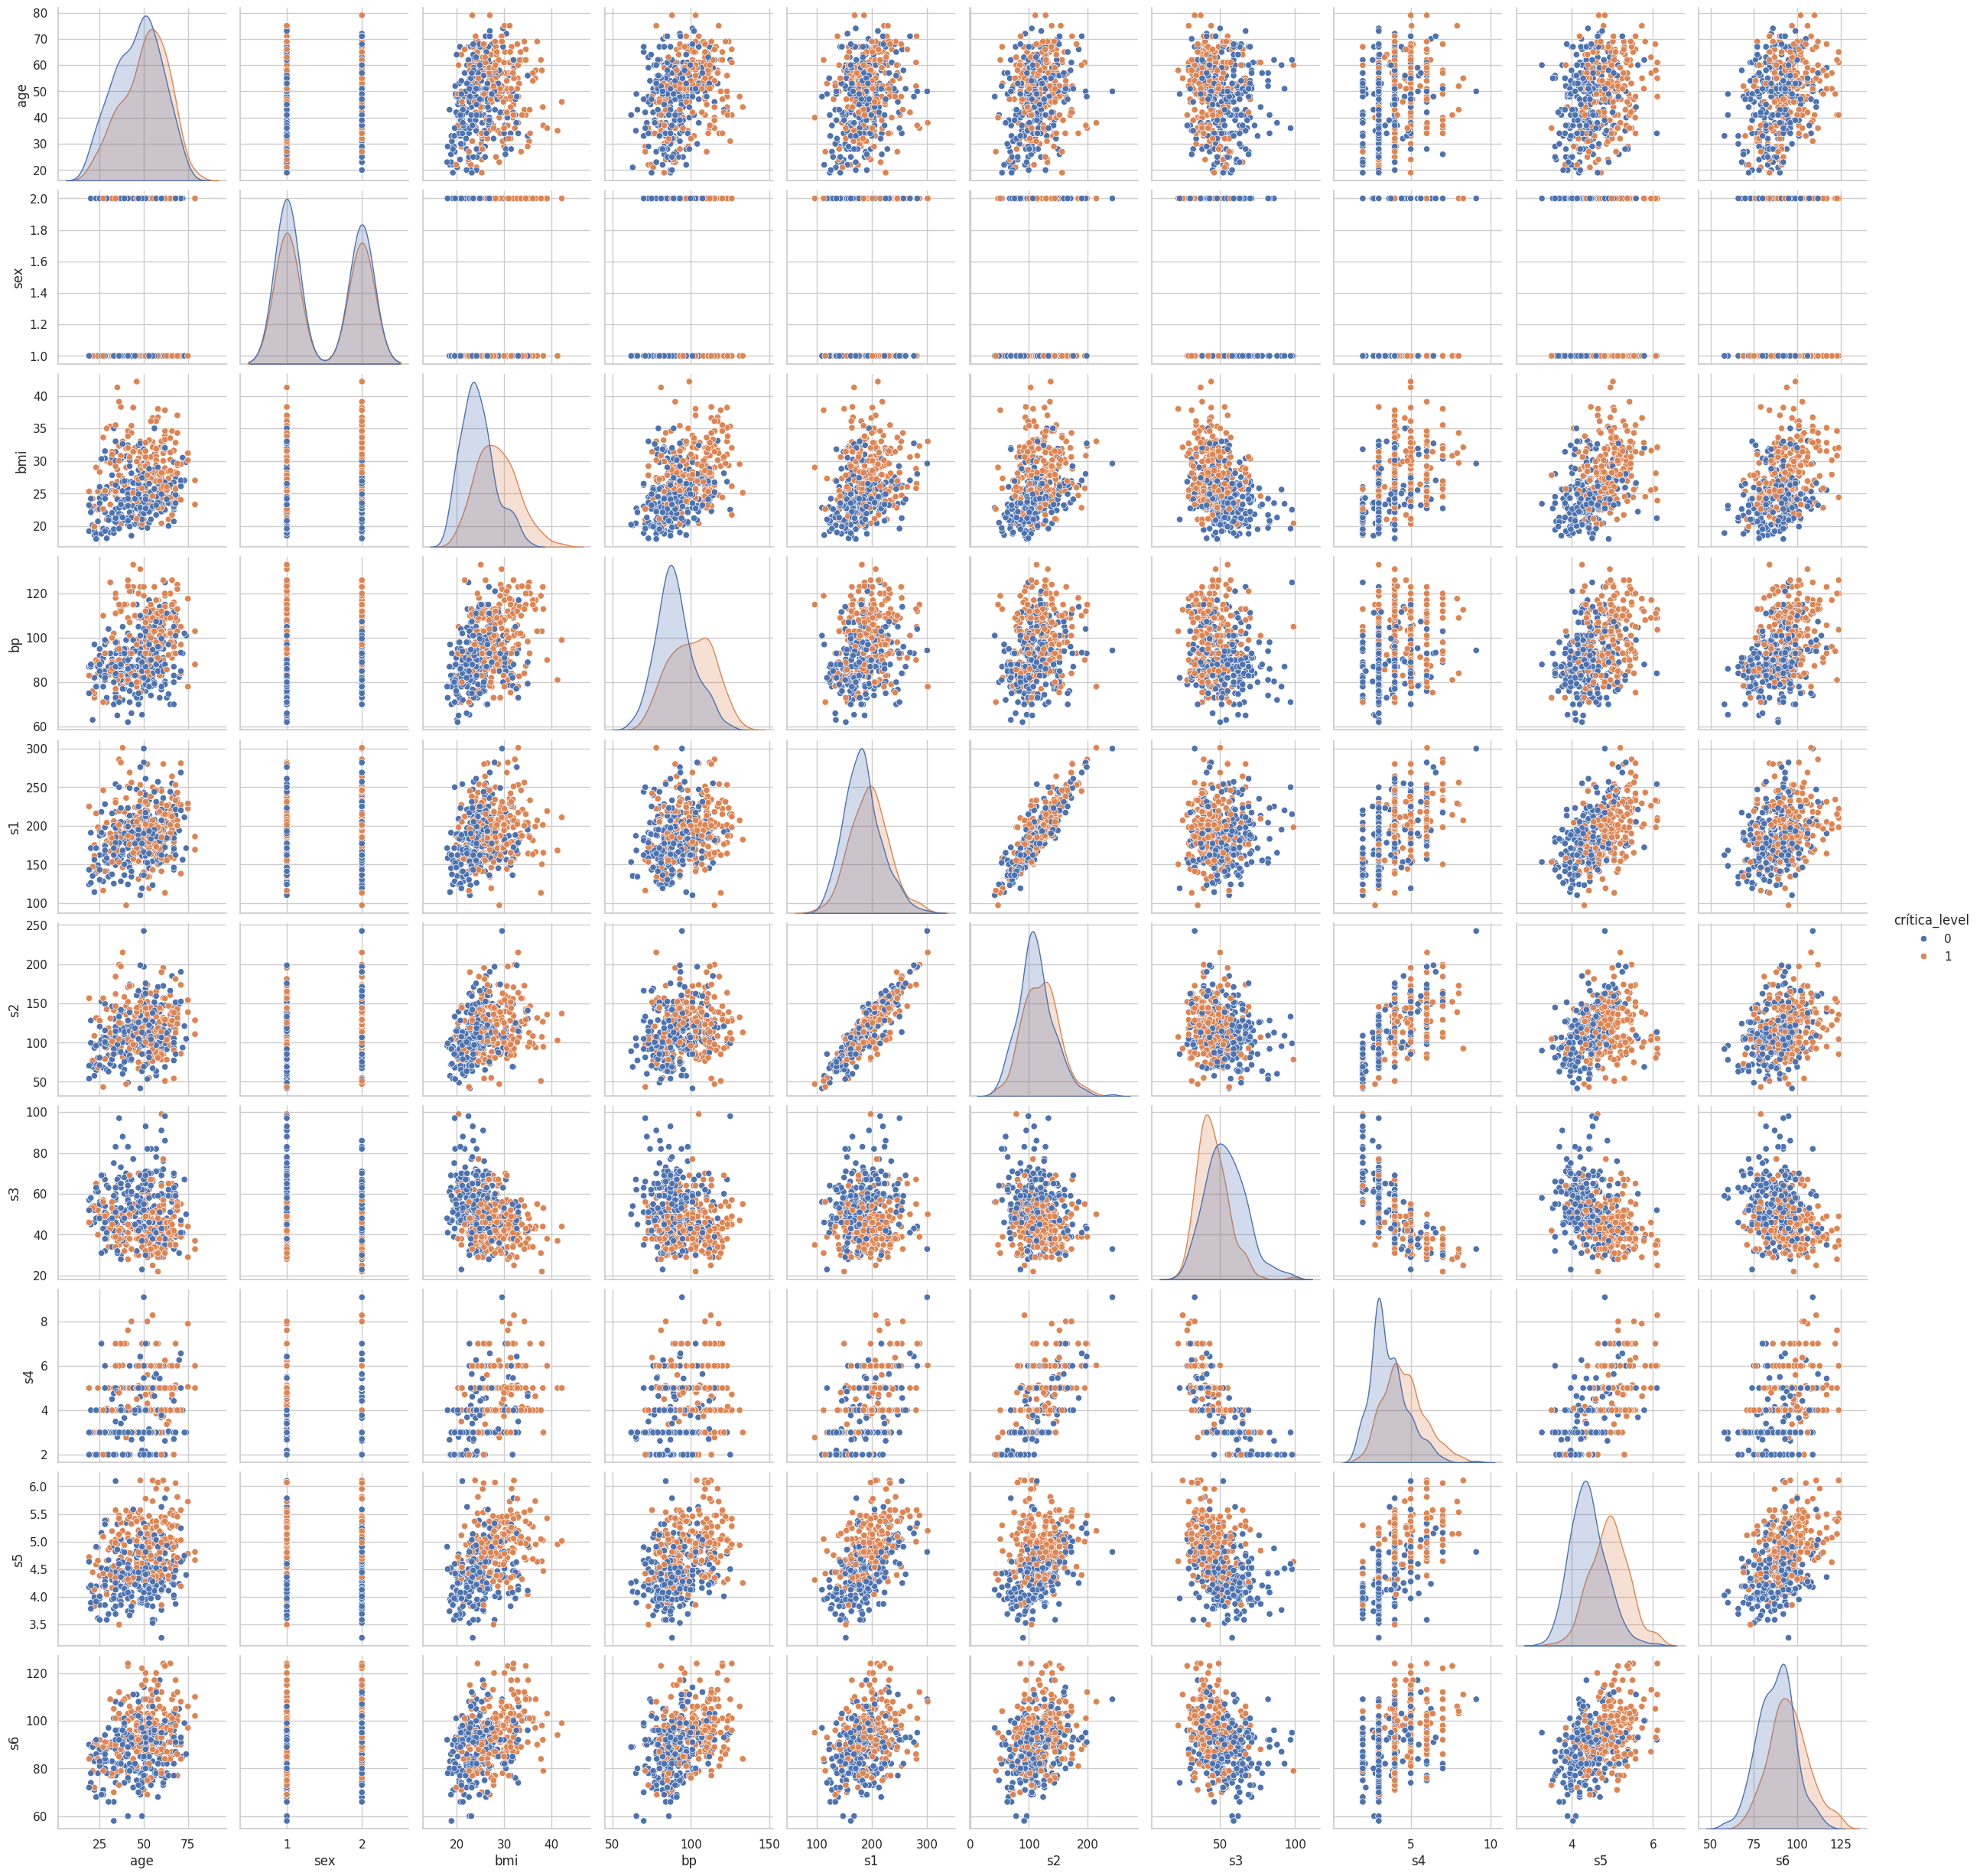

In [7]:
# Visualización
#Observar el efecto de la correlación entre dos variables con PAIRPLOT
sns.set(style="whitegrid", context="notebook")
sns.pairplot(df, hue="crítica_level", diag_kind="kde")
plt.show()

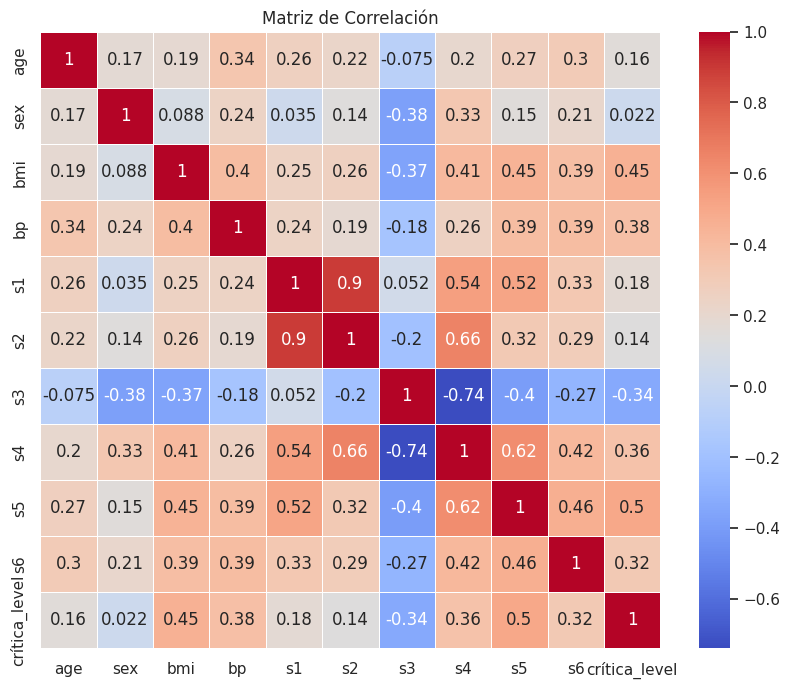

In [8]:
# Matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

##Conclusiones de la matriz de correlaciones (Clasificación)
La matriz de correlación muestra las relaciones entre las variables del conjunto de datos de diabetes. Los valores de correlación varían de -1 a 1, donde -1 indica una correlación negativa perfecta, 0 indica ninguna correlación y 1 indica una correlación positiva perfecta.

1.   **Correlación con la variable dependiente (Critical_level)**:

 - **S5 (concentración de suero)**: Es la variable con la correlación más alta con Critical_level, con un valor de 0.5. Esto sugiere que S5 es un buen predictor del progreso de la diabetes.
 - **BMI (índice de masa corporal)**: Tiene una correlación de 0.45 con Critical_level, lo que indica que también es un predictor significativo.
  - **BP (presión arterial) y S6 (otra concentración de suero)**: Tienen correlaciones de 0.38 y 0.32 respectivamente, mostrando una relación moderada con Critical_level.

2. **Correlaciones entre variables independientes**:

 - **S1 y S2**: Estas variables están altamente correlacionadas entre sí (0.9), lo cual podría indicar multicolinealidad. Esto podría ser importante al considerar modelos predictivos.
 - **S2 y S4**: También muestran una correlación alta (0.66), lo cual es otra señal de multicolinealidad.
 - **S3 y S4**: Tienen una correlación negativa alta (-0.74), sugiriendo que estas variables se mueven en direcciones opuestas.


3. **Otras observaciones**

  - **Age (edad)**: Tiene correlaciones bajas con Critical_level (0.16) y con otras variables. Esto sugiere que la edad podría no ser un buen predictor del progreso de la diabetes en este dataset.
  - **Sex (género)**: Tiene una correlación mínima con Critical_level (0.022), indicando que el género probablemente no afecta significativamente el progreso de la diabetes en este conjunto de datos.
  
En resumen, para predecir la variable Critical_level, sería útil centrarse en S5, BMI, BP, y S6 debido a sus correlaciones relativamente altas. Sin embargo, es importante considerar la multicolinealidad entre las variables S1 y S2, y entre S2 y S4.

##Prueba de Hipótesis relevancia de las variables en el modelo


$$
\ln\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_k x_k
$$

Donde:
- ($\ln$) es la función logaritmo natural,
- ($p$) es la probabilidad de éxito (en nuestro caso, la probabilidad de que "crítica\_level" sea 1)
- ($\beta_0$, $\beta_1$, $\beta_2$, $\ldots$, $\beta_k$\) son los coeficientes de regresión para las variables independientes ($x_1$, $x_2$, $\ldots$, $x_k$).

<br>

\begin{align*}
\text{Hipótesis Nula ($H_0$):} & \quad \beta_i = 0 \quad \text{(La variable no tiene efecto)} \\
\text{Hipótesis Alternativa ($H_1$):} & \quad \beta_i \neq 0 \quad \text{(La variable tiene efecto)}
\end{align*}

In [9]:
import statsmodels.api as sm

# Pruebas de hipótesis (usando statsmodels)
X = df.drop("crítica_level", axis=1)
X = sm.add_constant(X)  # Agregar constante para la regresión
y = df["crítica_level"]

model = sm.Logit(y, X)
result = model.fit()

print("="*90)

# Crear una tabla para mostrar los resultados y la relevancia de variables
table_data = result.summary().tables[1].data[1:]  # Excluir la primera fila (encabezados)
columns = ["X","Coeficiente", "Std Err", "Z", "P>|z|", "[0.025", "0.975]"]
summary_df = pd.DataFrame(table_data, columns=columns)

# Convertir las columnas numéricas a tipo float
for column in columns:
  if(column != "X"):
    summary_df[column] = pd.to_numeric(summary_df[column], errors="coerce")
  else:
    pass

# Agregar la columna "Variable Relevante" basada en el p-value y una significancia de 0.05
summary_df["Relevante"] = summary_df["P>|z|"].apply(lambda p: "Sí" if p <= 0.05 else "No")

# Imprimir la tabla con la decisión de relevancia
print(summary_df)


Optimization terminated successfully.
         Current function value: 0.465639
         Iterations 7
        X  Coeficiente  Std Err      Z  P>|z|  [0.025  0.975] Relevante
0   const     -17.5084    3.919 -4.467  0.000 -25.190  -9.827        Sí
1     age      -0.0002    0.010 -0.023  0.981  -0.020   0.020        No
2     sex      -0.9947    0.293 -3.391  0.001  -1.570  -0.420        Sí
3     bmi       0.1272    0.035  3.606  0.000   0.058   0.196        Sí
4      bp       0.0406    0.011  3.799  0.000   0.020   0.061        Sí
5      s1      -0.0556    0.033 -1.701  0.089  -0.120   0.008        No
6      s2       0.0458    0.032  1.450  0.147  -0.016   0.108        No
7      s3       0.0146    0.042  0.347  0.729  -0.068   0.097        No
8      s4       0.0123    0.297  0.042  0.967  -0.570   0.594        No
9      s5       3.2509    0.931  3.493  0.000   1.427   5.075        Sí
10     s6       0.0098    0.013  0.734  0.463  -0.016   0.036        No


##Regresión Logistica

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [16]:
# Cargar el dataset load_diabetes
data = load_diabetes()

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [17]:
#Dividir el data set en conjunto de entrenamiento y conjunto de testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


#Escalado de variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
# Ajustar el clasificador en el Conjunto de Entrenamiento

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test)


## Matriz de Confusión

La matriz de confusión es una herramienta fundamental en la evaluación de modelos de clasificación en el campo del aprendizaje automático. Esta matriz permite visualizar el rendimiento de un modelo al comparar las predicciones hechas por el modelo con las etiquetas reales del conjunto de datos. La matriz de confusión generalmente se representa de la siguiente manera:


|               | Clase real   |               |
|---------------|:------------:|:-------------:|
|               | Positiva     | Negativa      |
| **Predicción**    |              |               |
| Positiva      | VP           | FP            |
| Negativa      | FN           | VN            |


Donde:

- **Verdadero Positivo (VP):** El modelo predijo correctamente una instancia positiva.
- **Falso Positivo (FP):** El modelo predijo incorrectamente una instancia negativa como positiva.
- **Falso Negativo (FN):** El modelo predijo incorrectamente una instancia positiva como negativa.
- **Verdadero Negativo (VN):** El modelo predijo correctamente una instancia negativa.

A partir de esta matriz, podemos calcular diversas métricas de rendimiento, incluyendo:

- **Accuracy (Exactitud):** La exactitud mide la proporción de predicciones correctas, es decir, la proporción de todas las predicciones que fueron correctas en relación con el tamaño total del conjunto de datos.

$$
\text{Accuracy} = \frac{VP + VN}{VP + VN + FP + FN}
$$

- **Precisión (Precision):** La precisión mide la proporción de predicciones positivas correctas entre todas las predicciones positivas del modelo.

$$
\text{Precisión} = \frac{VP}{VP + FP}
$$

- **Recall (Sensibilidad o Tasa de Verdaderos Positivos):** El recall mide la proporción de instancias positivas reales que fueron correctamente identificadas por el modelo.

$$
\text{Recall} = \frac{VP}{VP + FN}
$$

- **F1-Score:** El F1-Score es la media armónica entre la precisión y el recall y es útil cuando se desea equilibrar ambas métricas.

$$
\text{F1-Score} = \frac{2 \cdot \text{Precisión} \cdot \text{Recall}}{\text{Precisión} + \text{Recall}}
$$

In [21]:
# Calcular la matriz de confusión
confusion_matrix_diabetes = confusion_matrix(y_test, y_pred)
accuracy_diabetes = accuracy_score(y_test, y_pred)
precision_diabetes = precision_score(y_test, y_pred)
recall_diabetes = recall_score(y_test, y_pred)
f1_score_diabetes = f1_score(y_test, y_pred)

print("Resultados para Diabetes:")
print("Matriz de Confusión:")
print(confusion_matrix_diabetes)
print("Accuracy:", accuracy_diabetes)
print("Precision:", precision_diabetes)
print("Recall:", recall_diabetes)
print("F1-Score:", f1_score_diabetes)

Resultados para Diabetes:
Matriz de Confusión:
[[85  0]
 [ 0 63]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


Precisión (Accuracy): 1.00


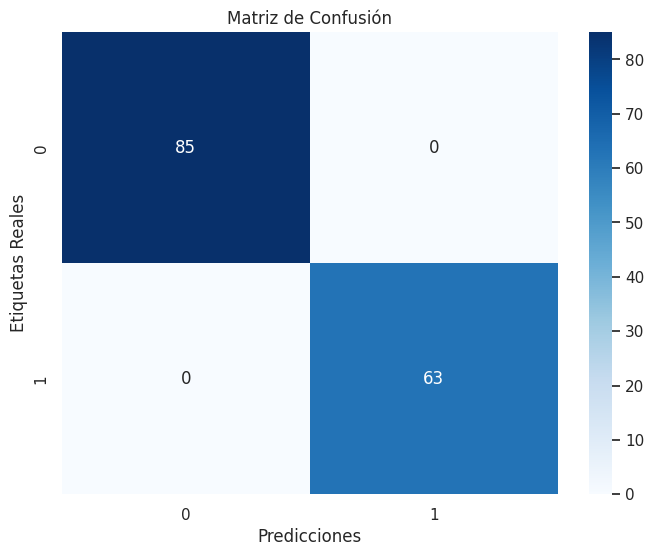

In [23]:
# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión (Accuracy): {accuracy:.2f}')

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión')
plt.show()


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Analizar el problema de regresión**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from scipy.stats import ttest_ind

# Cargar el conjunto de datos de diabetes
data = load_diabetes(scaled=False)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['progression'] = data.target

# Información general sobre el dataset
print("Información general:")
print(df.info())

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [25]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
              age         sex         bmi          bp          s1          s2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               s3          s4          s5          s6  progression  
count  442.000000  442.000000  442.000000  442.000000   442.000000  
mean    49.788462    4.070249    4.641411   91.260181   152.133484  
std     12.934202    1.290450    0.

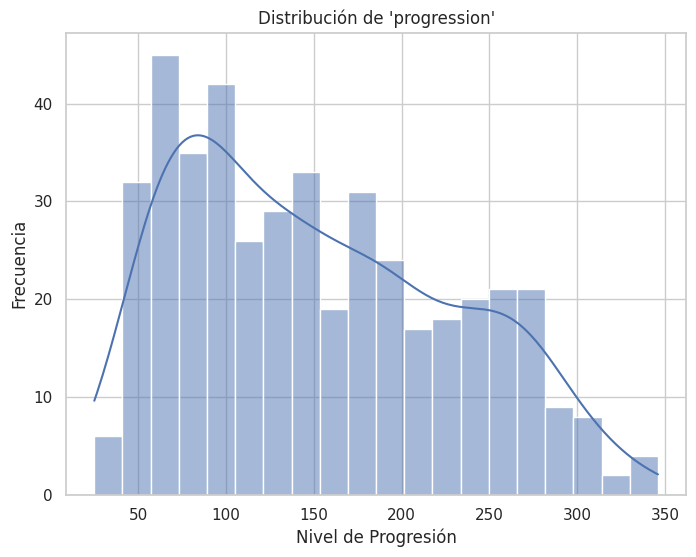

In [26]:
# Distribución de la variable 'progression'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='progression', bins=20, kde=True)
plt.title("Distribución de 'progression'")
plt.xlabel("Nivel de Progresión")
plt.ylabel("Frecuencia")
plt.show()


##Conclusión Gráfico Histograma "Distribución de 'progression'"

El eje X del gráfico representa el nivel de progresión de la diabetes y el eje Y representa la frecuencia. En este caso, la distribución de la variable objetivo "progression" parece ser aproximadamente unimodal.

Si bien no se puede determinar la forma exacta de la distribución (por ejemplo, normal, sesgada a la derecha) a partir del histograma provisto, sí se puede observar que la mayoría de los valores de progresión se encuentran en el rango de 50 a 150.

Es importante tener en cuenta que este es solo un análisis visual de la distribución y se necesitarían pruebas estadísticas formales para confirmar cualquier suposición

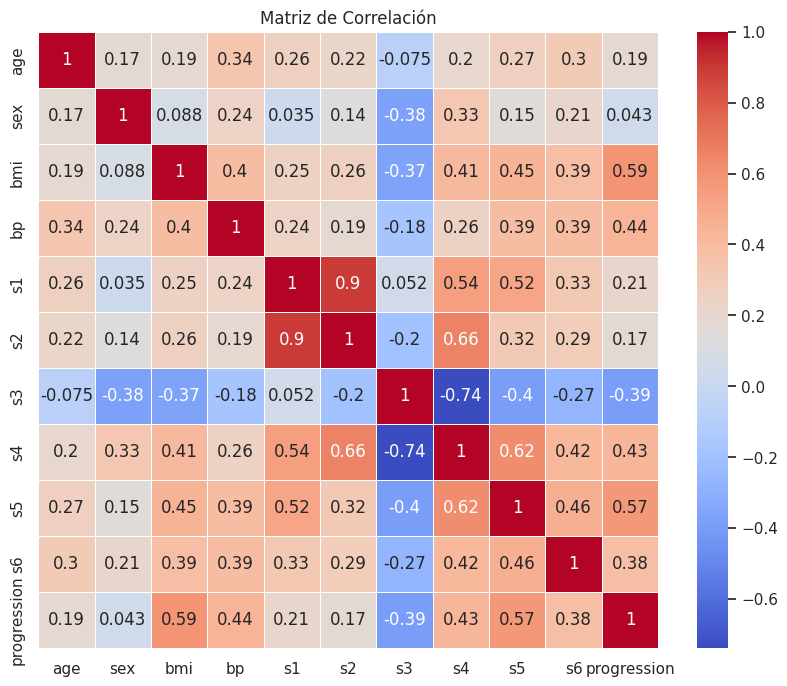

In [27]:
# Correlación entre variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

##Conclusión de matriz de correlaciones (Regresión)

La matriz de correlación muestra las relaciones entre las variables del conjunto de datos de diabetes. Los valores de correlación varían de -1 a 1, donde -1 indica una correlación negativa perfecta, 0 indica ninguna correlación y 1 indica una correlación positiva perfecta.

1. **Correlación con la variable dependiente**: Las variables con la correlación más fuerte con la variable dependiente "progression" son:

  - **s6**: Concentración de suero de tipo s6 (r = 0.57)
  - **s5**: Concentración de suero de tipo s5 (r = 0.53)
  - **age**: Edad del paciente en años (r = 0.44)
  - **s4**: Concentración de suero de tipo s4 (r = 0.43)
  - **bmi**: Índice de masa corporal (BMI) del paciente (r = 0.41)

  Estas variables tienen una correlación positiva con la variable dependiente "progression", lo que significa que a medida que aumentan los valores de estas variables, también aumenta el valor de la variable dependiente "progression".

2. **Correlación entre variables independientes**: Las variables con la correlación más débil con la variable dependiente "progression" son:

  - **sex**: Género del paciente (0 para mujer, 1 para hombre) (r = 0.043)

  Esta variable tiene una correlación muy débil con la variable dependiente "progression", lo que significa que no hay una relación significativa entre el género del paciente y el progreso de la diabetes.

En general, la matriz de correlación proporciona información valiosa sobre las relaciones entre las variables del conjunto de datos de diabetes. Esta información puede ser utilizada para desarrollar un modelo de regresión para predecir el progreso de la diabetes.

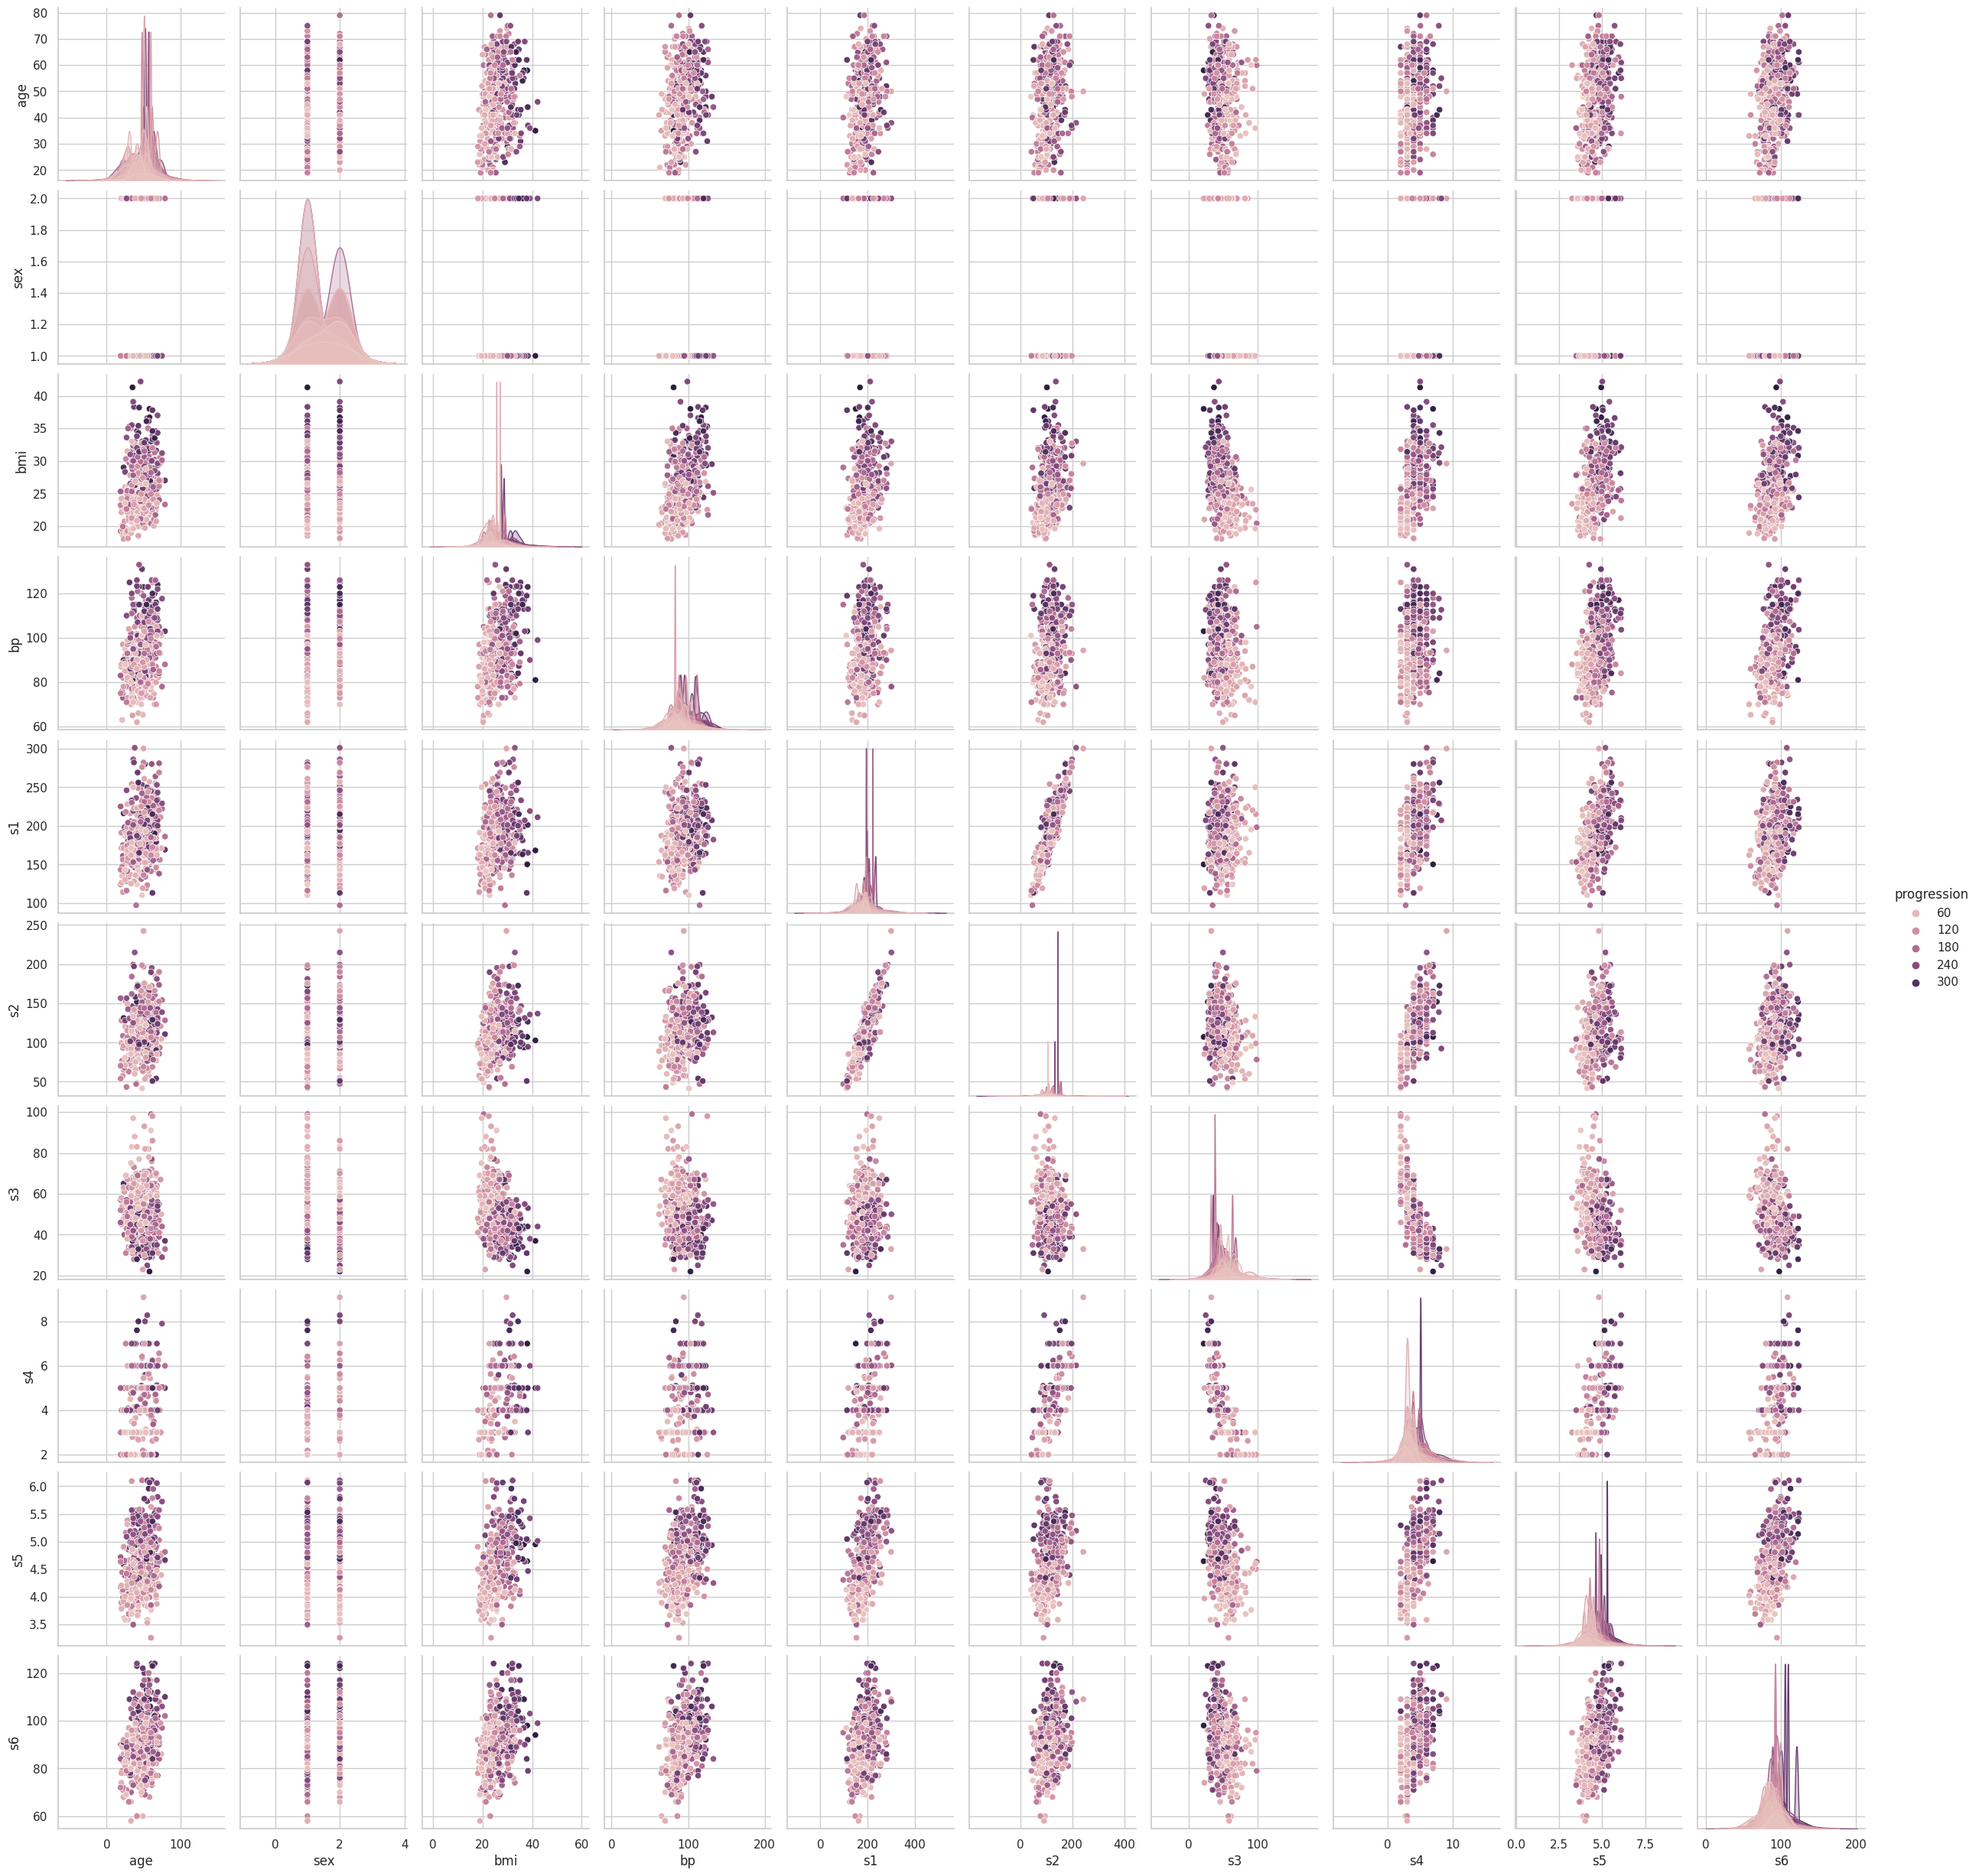

In [ ]:
# Visualización
sns.set(style="whitegrid", context="notebook")
sns.pairplot(df, hue="progression", diag_kind="kde")
plt.show()

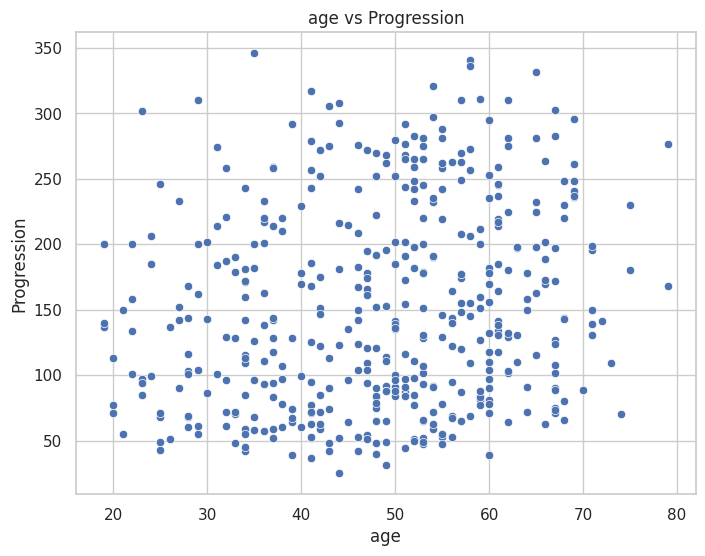

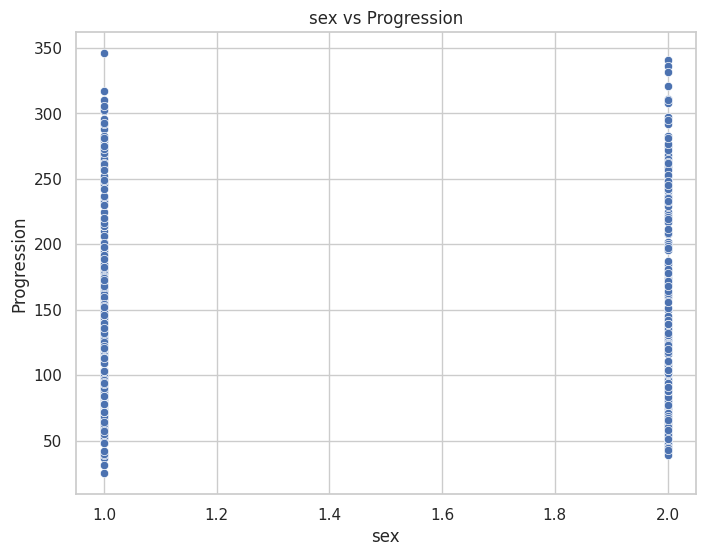

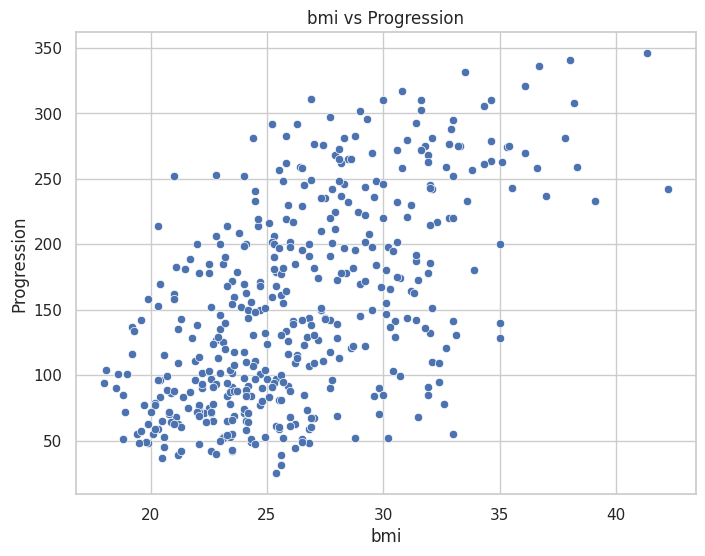

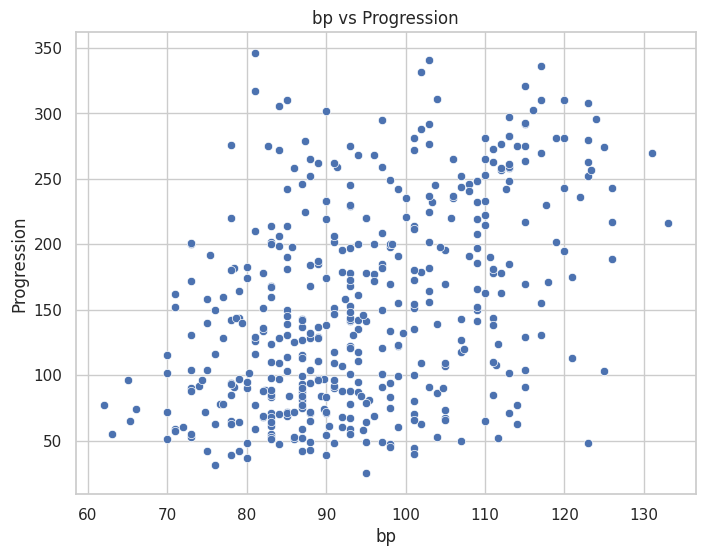

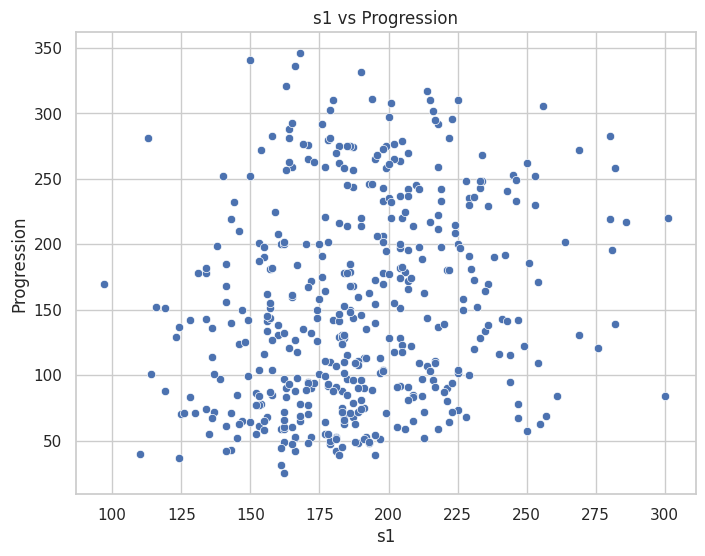

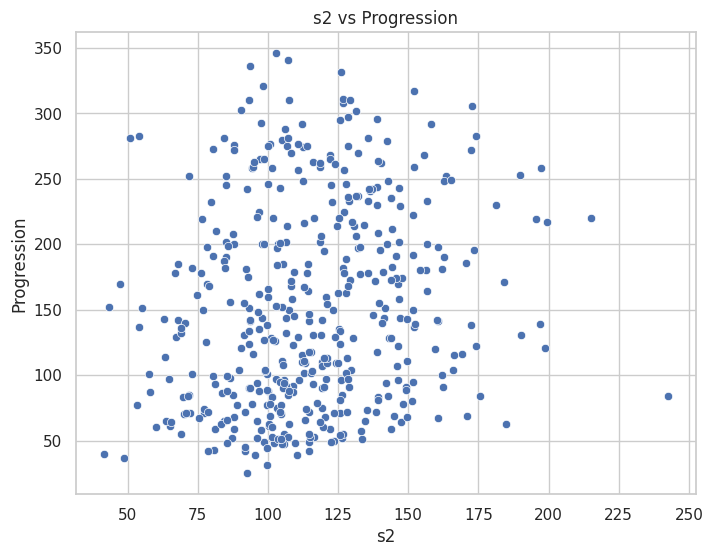

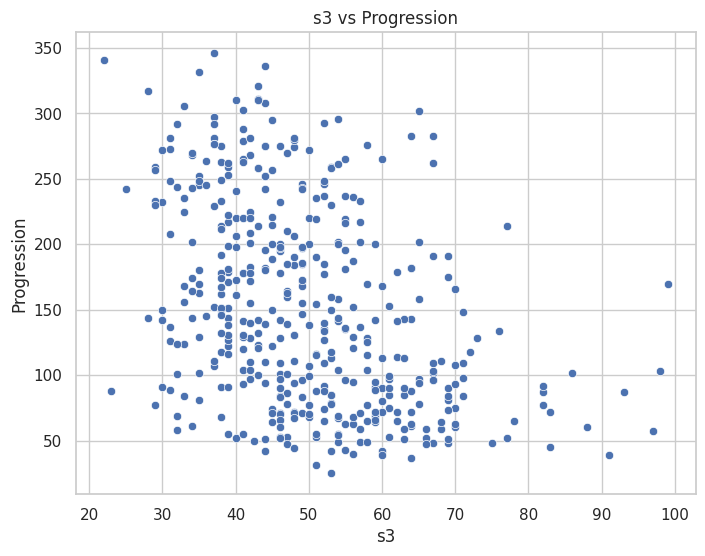

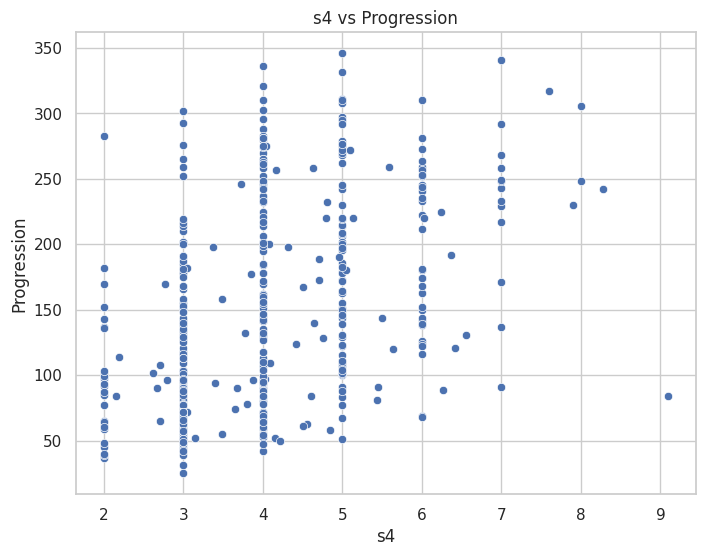

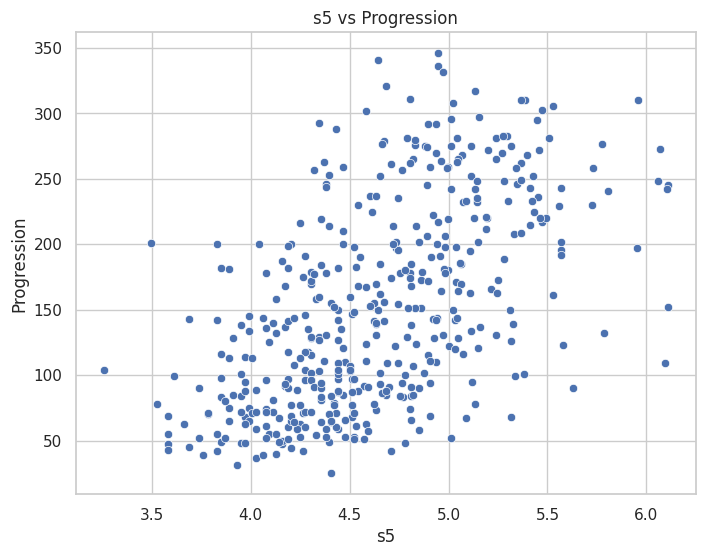

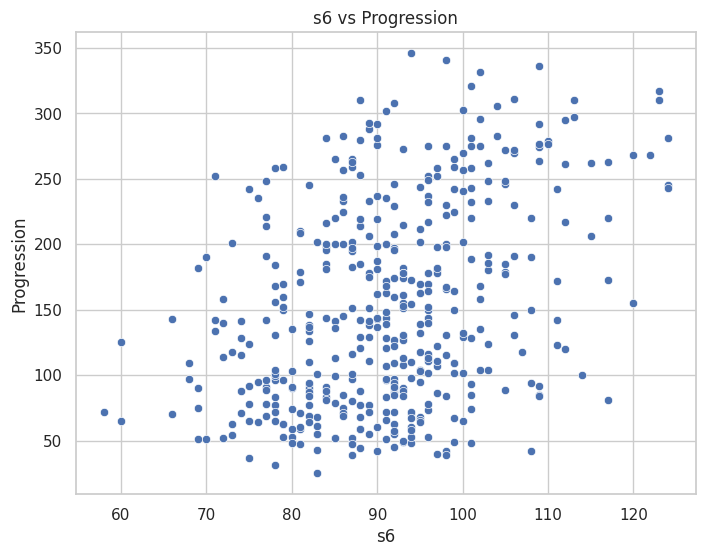


Comparación de 'progression' entre sexos:
T-estadística: nan
P-valor: nan


In [28]:
# Análisis de características individuales con 'progression'
features = data.feature_names
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='progression', data=df)
    plt.title(f"{feature} vs Progression")
    plt.xlabel(feature)
    plt.ylabel("Progression")
    plt.show()

# Comparación de 'progression' entre sexos
male_progression = df[df['sex'] == 1]['progression']
female_progression = df[df['sex'] == 0]['progression']
t_stat, p_value = ttest_ind(male_progression, female_progression)
print("\nComparación de 'progression' entre sexos:")
print(f"T-estadística: {t_stat}")
print(f"P-valor: {p_value}")


In [ ]:
print("Información general del conjunto de datos:")
print(df.info())

Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [ ]:
print("\nPrimeros registros del conjunto de datos:")
print(df.head())


Primeros registros del conjunto de datos:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  progression  
0 -0.002592  0.019907 -0.017646        151.0  
1 -0.039493 -0.068332 -0.092204         75.0  
2 -0.002592  0.002861 -0.025930        141.0  
3  0.034309  0.022688 -0.009362        206.0  
4 -0.002592 -0.031988 -0.046641        135.0  


In [ ]:
print("\nEstadísticas descriptivas del conjunto de datos:")
print(df.describe())


Estadísticas descriptivas del conjunto de datos:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
s

##Regresión Lineal


In [30]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [31]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [32]:
# Crear modelo de Regresión Lienal Simple con el conjunto de entrenamiento
from sklearn.linear_model import LinearRegression

In [33]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predecir el conjunto de test
y_pred = regression.predict(X_test)
y_pred

array([2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 2., 2., 1.,
       1., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2.,
       2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1.,
       2., 1., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1.,
       2., 1., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2.,
       2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1.,
       2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.])